In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
train = pd.read_csv('../output/processed_train_1.4.csv')

In [33]:
train.head()

,object_id,hostgal_photoz,hostgal_photoz_err,mwebv,target,hostgal_photoz_uncertainty,hostgal_photoz_ratio_sq,hostgal_photoz_by_hostgal_photoz_ratio_sq,flux_min,flux_max,...,3__skewness,"4__fft_coefficient__coeff_0__attr_""abs""","4__fft_coefficient__coeff_1__attr_""abs""",4__kurtosis,4__skewness,"5__fft_coefficient__coeff_0__attr_""abs""","5__fft_coefficient__coeff_1__attr_""abs""",5__kurtosis,5__skewness,mjd_diff_det
0,615,0.0000,0.0000,0.017,92,NaN,NaN,NaN,-1100.440063,660.626343,...,0.293128,3245.366349,2741.539785,-1.548319,0.200096,2704.641265,2893.344217,-1.592820,0.125268,873.7903
1,713,1.6267,0.2552,0.007,88,15.688203,40.630633,66.093851,-14.735178,14.770886,...,-0.167176,50.414646,203.892482,-1.190245,-0.064134,100.473776,143.963093,-0.797047,0.218182,846.8017
2,730,0.2262,0.0157,0.021,42,6.940760,207.580186,46.954638,-19.159811,47.310059,...,2.662075,219.745132,202.532898,6.081065,2.537802,231.509177,199.286370,3.583130,1.680352,78.7737
3,745,0.2813,1.1523,0.007,90,409.633843,0.059595,0.016764,-15.494463,220.795212,...,3.751603,735.528417,680.055280,13.747434,3.476420,591.037583,523.503586,12.134629,3.170857,123.6872
4,1124,0.2415,0.0176,0.024,90,7.287785,188.282057,45.470117,-16.543753,143.600189,...,3.603208,574.553907,524.107264,16.377058,3.904008,393.114268,357.907185,14.434470,3.657305,133.9113


In [34]:
train[train['hostgal_photoz'] == 0]['target'].value_counts()

65    981
16    924
92    239
6     151
53     30
Name: target, dtype: int64

In [35]:
train[train['hostgal_photoz'] > 0]['target'].value_counts()

90    2313
42    1193
15     495
62     484
88     370
67     208
52     183
95     175
64     102
Name: target, dtype: int64

In [36]:
targets = np.hstack([np.unique(train['target']), [99]])
target_map = {j:i for i, j in enumerate(targets)}
target_ids = [target_map[i] for i in train['target']]
train['target_id'] = target_ids

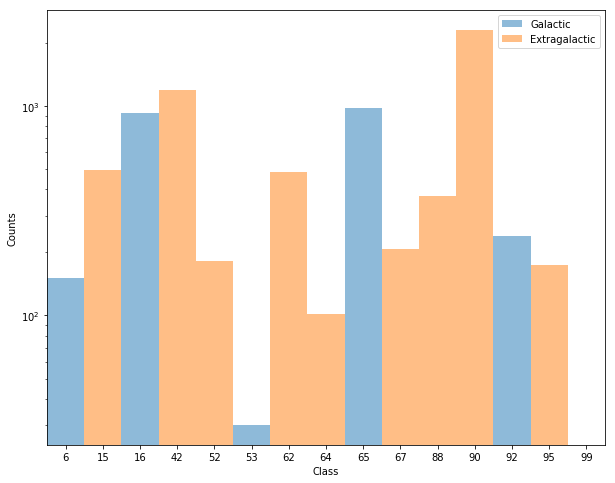

In [37]:
galactic_cut = train['hostgal_photoz'] == 0
plt.figure(figsize=(10, 8))
plt.hist(train[galactic_cut]['target_id'], 15, (0, 15), alpha=0.5, label='Galactic')
plt.hist(train[~galactic_cut]['target_id'], 15, (0, 15), alpha=0.5, label='Extragalactic')
plt.xticks(np.arange(15)+0.5, targets)
plt.gca().set_yscale("log")
plt.xlabel('Class')
plt.ylabel('Counts')
plt.xlim(0, 15)
plt.legend();

In [38]:
# Build the flat probability arrays for both the galactic and extragalactic groups
galactic_cut = train['hostgal_photoz'] == 0
galactic_data = train[galactic_cut]
extragalactic_data = train[~galactic_cut]

galactic_classes = np.unique(train['target_id'])
extragalactic_classes = np.unique(train['target_id'])

# Add class 99 (id=14) to both groups.
galactic_classes = np.append(galactic_classes, 14)
extragalactic_classes = np.append(extragalactic_classes, 14)

galactic_probabilities = np.zeros(15)
galactic_probabilities[galactic_classes] = 1. / len(galactic_classes)
extragalactic_probabilities = np.zeros(15)
extragalactic_probabilities[extragalactic_classes] = 1. / len(extragalactic_classes)

In [39]:
# Apply this prediction to a table
import tqdm
def do_prediction(table):
    probs = []
    for index, row in tqdm.tqdm(table.iterrows(), total=len(table)):
        if row['hostgal_photoz'] == 0:
            prob = galactic_probabilities
        else:
            prob = extragalactic_probabilities
        probs.append(prob)
    return np.array(probs)

pred = do_prediction(train)
# test_pred = do_prediction(test_meta_data)

100%|██████████| 7848/7848 [00:00<00:00, 30040.52it/s]


In [40]:
pred

array([[0.06666667, 0.06666667, 0.06666667, ..., 0.06666667, 0.06666667,
        0.06666667],
       [0.06666667, 0.06666667, 0.06666667, ..., 0.06666667, 0.06666667,
        0.06666667],
       [0.06666667, 0.06666667, 0.06666667, ..., 0.06666667, 0.06666667,
        0.06666667],
       ...,
       [0.06666667, 0.06666667, 0.06666667, ..., 0.06666667, 0.06666667,
        0.06666667],
       [0.06666667, 0.06666667, 0.06666667, ..., 0.06666667, 0.06666667,
        0.06666667],
       [0.06666667, 0.06666667, 0.06666667, ..., 0.06666667, 0.06666667,
        0.06666667]])

In [3]:
test = pd.read_csv('../output/processed_test_1.3.csv')

In [4]:
test[test['hostgal_photoz'] > 0].shape

(3102380, 67)

In [5]:
test[test['hostgal_photoz'] == 0].shape

(390510, 67)

Most objects in test set are extra-galactic.